In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
train = pd.read_csv(r"..\data\train.csv")
test = pd.read_csv(r"..\data\test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = train.drop(columns = ["label"])
y = train.loc[:, "label"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

In [8]:
input_shape = (784,)

In [9]:
num_classes = 10

In [10]:
model = keras.Sequential([
    layers.Input(shape = input_shape),
    layers.BatchNormalization(),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation = 'relu'),
    layers.Flatten(),
    layers.Dense(num_classes, activation = 'softmax')
])

In [11]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 0


In [12]:
#### INstall cuda 

In [13]:
optimizer = "adam"
loss = 'sparse_categorical_crossentropy'
metrics = ["accuracy"]

In [14]:
model.compile(optimizer = optimizer,
              loss = loss,
              metrics = metrics
)

In [15]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

Epoch 1/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9954 - loss: 0.0215 - val_accuracy: 0.9628 - val_loss: 0.1442
Epoch 2/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9954 - loss: 0.0179 - val_accuracy: 0.9633 - val_loss: 0.1631
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9968 - loss: 0.0144 - val_accuracy: 0.9610 - val_loss: 0.1794
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9968 - loss: 0.0132 - val_accuracy: 0.9661 - val_loss: 0.1774
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9986 - loss: 0.0080 - val_accuracy: 0.9650 - val_loss: 0.1793


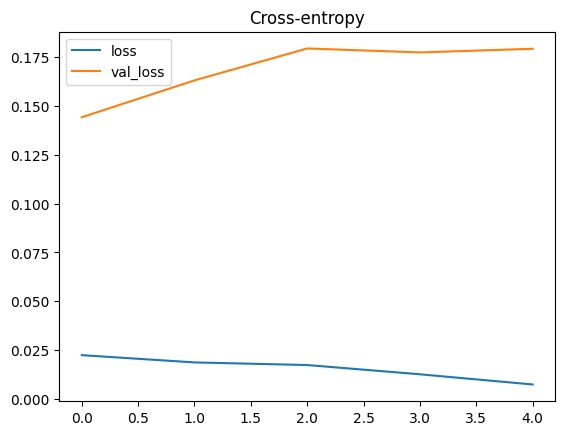

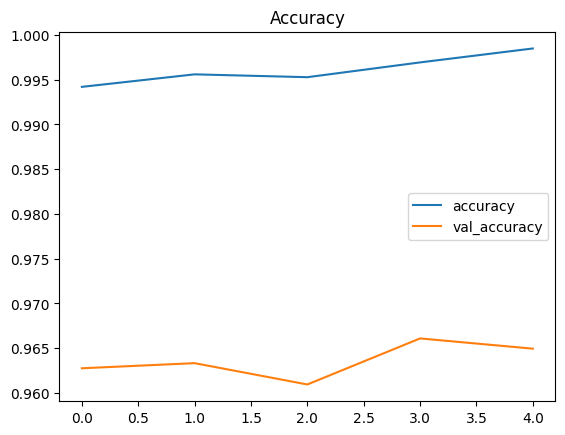

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");

In [22]:
predictions = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [24]:
predicted_labels = np.argmax(predictions, axis=1)

In [26]:
submission_example = pd.read_csv(r"..\data\sample_submission.csv")

In [27]:
submission_example.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [34]:
test.index

RangeIndex(start=0, stop=28000, step=1)

In [32]:
len(predicted_labels)

28000

In [35]:
my_submission = pd.DataFrame({'ImageId': range(1, 28001), 'Label': predicted_labels})
my_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [39]:
my_submission.to_csv("tensorflow1.csv", index=False)